<a href="https://colab.research.google.com/github/yeomyeom/2019_cau_oss_hackathon/blob/master/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math

from google.colab import files
files.upload()

Saving testing.txt to testing.txt
Saving training.txt to training.txt


{'testing.txt': b'1.007260000000000044e+00,2.682723010745024506e-01,0.000000000000000000e+00\r\n8.737800000000000011e-01,2.045391025559268328e-01,0.000000000000000000e+00\r\n9.825399999999999689e-01,2.455260437539819041e-01,0.000000000000000000e+00\r\n1.059770000000000101e+00,2.650698096173950691e-01,0.000000000000000000e+00\r\n7.425000000000000488e-01,2.287132746030017816e-01,0.000000000000000000e+00\r\n9.517200000000000104e-01,3.273635066819135520e-01,0.000000000000000000e+00\r\n9.785899999999999599e-01,2.906972963649049335e-01,0.000000000000000000e+00\r\n9.082299999999999818e-01,2.874443335355546525e-01,0.000000000000000000e+00\r\n7.975400000000000267e-01,3.932732246986079261e-01,0.000000000000000000e+00\r\n6.690700000000000536e-01,2.394144127315999959e-01,0.000000000000000000e+00\r\n8.483000000000000540e-01,5.364466374478659150e-01,0.000000000000000000e+00\r\n4.311400000000000232e-01,4.008868312672323464e-01,0.000000000000000000e+00\r\n8.144799999999999818e-01,2.447470304541743413e

#### 1. Training Data

- the training data are given by the file training.txt
- each element of the training data consists of $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ where $(x, y)$ denotes a 2-dimensional point and $l$ denotes its label
- $(x, y) \in \mathbb{R}^2$ and $l \in \{0, 1\}$

#### 2. Testing Data

- the training data are given by the file testing.txt
- each element of the training data consists of $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ where $(x, y)$ denotes a 2-dimensional point and $l$ denotes its label
- $(x, y) \in \mathbb{R}^2$ and $l \in \{0, 1\}$

#### 3. Logistic regression with a high dimensional feature function

- $p_w(x, y) = \sigma(z)$ 
- $z = g(x, y; \theta)$, where $g$ is a high dimensional function and $\theta \in \mathbb{R}^{100}$
- $\theta = (\theta_{0,0}, \theta_{0,1}, \cdots, \theta_{9,9})$
- $g(x, y ; \theta) = \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j} x^{i} y^{j}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 4. Objective Function with a regularization term

- $J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)})) \right] + \frac{\lambda}{2} \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j}^2$
- $z^{(i)} = g(x^{(i)}, y^{(i)}; \theta)$
- $g(x, y ; \theta) = \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j} x^{i} y^{j}$
- the degree of regularization is determined by the control parameter $\lambda$
- the larger value of $\lambda$ yields smoother classification boundary

#### 5. Gradient Descent

- $\theta_{i, j}^{(t+1)} := \theta_{i, j}^{(t)} - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) \frac{\partial z^{(i)}}{\partial \theta_{i, j}} + \lambda \theta_{i, j}^{(t)} \right]$, for all $i, j$
- you can use random initialization for the initial status of the model parameters $\theta_{i, j}^{(0)}$ for all $i, j$
- 여기에서 러닝 레이트를 iteration이 돌때마다 증가시키거나 감소시키거나 해도 된다.

#### 6. Hyper-parameter

- you can apply a annealing scheme for the learning rate that is scheduled as the gradient descent iteration proceeds
- the application of the learning rate annealing should lead to the convergence of the optimization
- demonstrate the effect of the regularization parameter with varying parameter values $\lambda = 0.00001, 0.0001, 0.001, 0.01, 0.1$

#### 7. Training

- find an optimal set of parameters $\theta$ using the training data with a given value of regularization parameter $\lambda$

#### 8. Compute the training accuracy

- the training accuracy is computed by $\frac{\textrm{number of correct predictions}}{\textrm{total number of predictions}}$ using the training data

#### 9. Compute the testing accuracy

- the testing accuracy is computed by $\frac{\textrm{number of correct predictions}}{\textrm{total number of predictions}}$ using the testing data


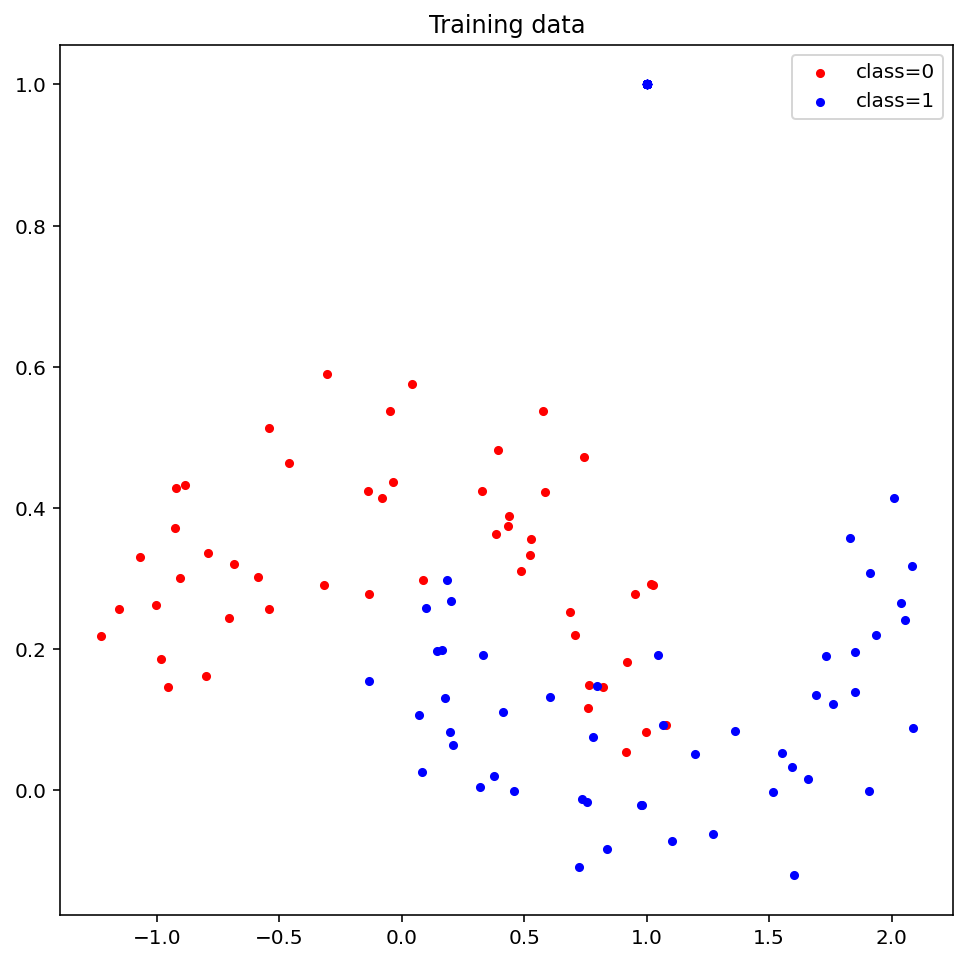

In [2]:
# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

x1_train_0 = data_train[idx_class0_train,0]
x2_train_0 = data_train[idx_class0_train,1]
x1_train_1 = data_train[idx_class1_train,0]
x2_train_1 = data_train[idx_class1_train,1]

plt.figure(1,figsize=(8,8))
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

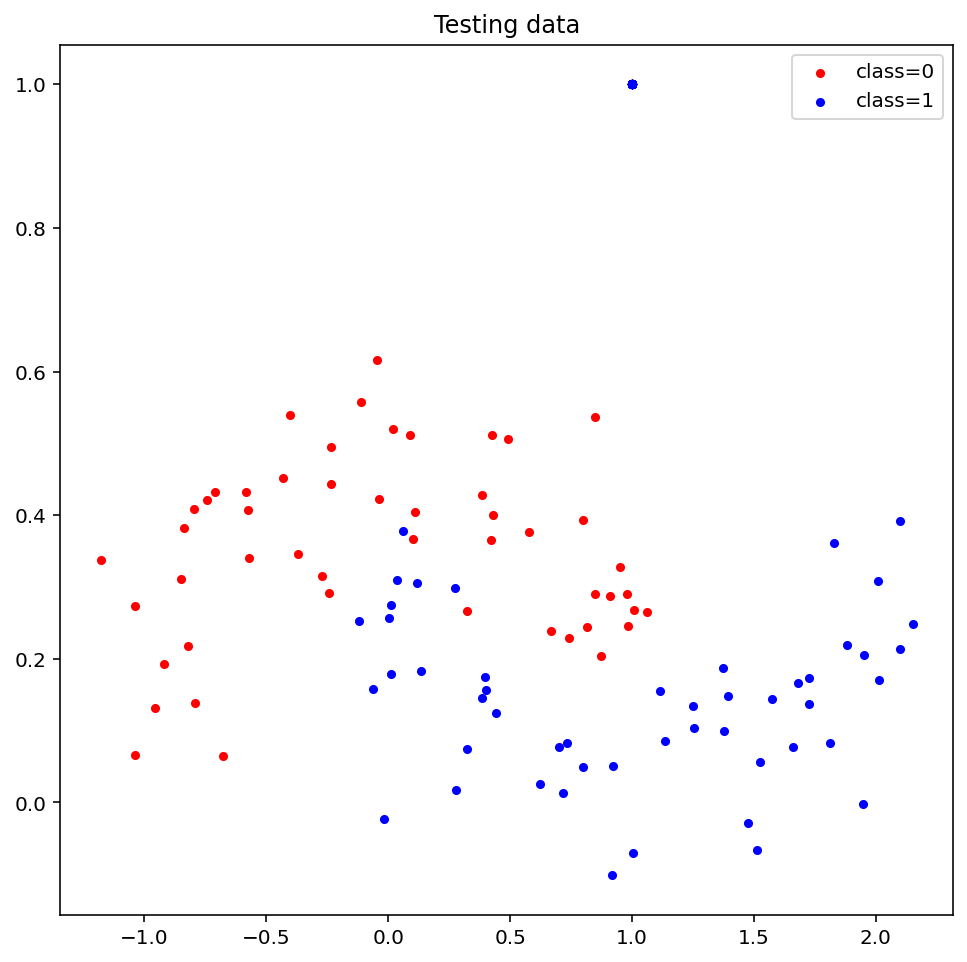

In [4]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

x1_test_0 = data_test[idx_class0_test,0]
x2_test_0 = data_test[idx_class0_test,1]
x1_test_1 = data_test[idx_class1_test,0]
x2_test_1 = data_test[idx_class1_test,1]

plt.figure(1,figsize=(8,8))
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

In [6]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = (1.0/(1.0+np.exp(-z)))
    return sigmoid_f 

# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w))
    return p

# loss function definition
def loss_logreg(y_pred,y,w,ramda): 
    n = len(y)
    loss = (-y.T.dot(np.log(y_pred))-((1.0-y).T.dot(np.log(1.0-y_pred))))/n
    # penalty
    loss += (ramda/len(w)) * sum(w*w) 
    return loss

# gradient function definition
# w에 대해서 미분
def grad_loss(y_pred,y,X,w,ramda):
    n = len(y)
    grad = (2.0/n)*(X.T.dot((y_pred-y)*(y_pred*(1.0-y_pred))))
    # penalty
    grad += (2.0*ramda/len(w)) * w
    return grad

# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter, ramda):
    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred =  f_pred(X,w)# linear predicition function   
        grad_f =  grad_loss(y_pred,y,X,w,ramda)# gradient of the loss
        #if i%50000 == 0:
        #  tau *= 10
        w = w - tau* grad_f# update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred,y,w,ramda)# save the current loss value 
    return w, L_iters, y_pred

0.2564328773624861
0.2604022807247198


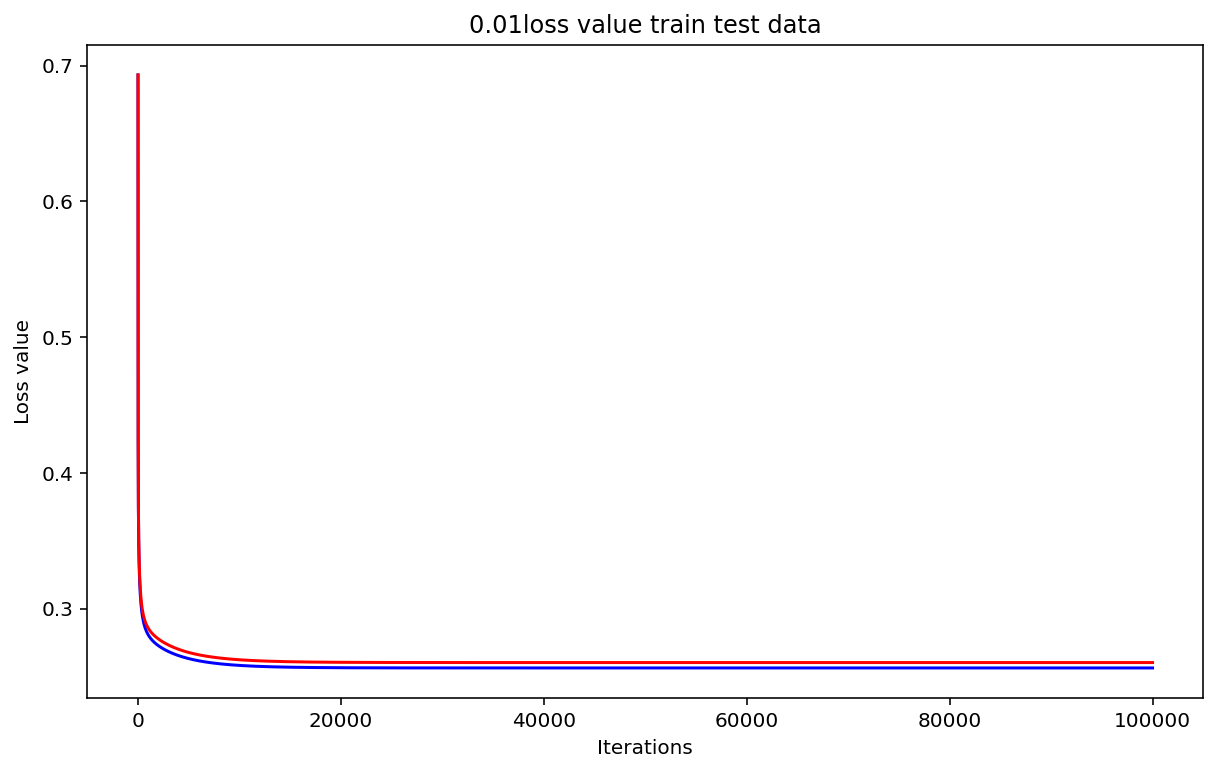

In [18]:
# construct the data matrix X, and label vector y
n_train = data_train.shape[0]
x1 = x1_train
x2 = x2_train
y_train = data_train[:,2][:,None] # label
X_train = np.ones([n_train, 10])
X_train[:,1] = x1
X_train[:,2] = x2
X_train[:,3] = x1 * x2
X_train[:,4] = x1 ** 2
X_train[:,5] = x2 ** 2
X_train[:,6] = x1 ** 2 * x2
X_train[:,7] = x2 ** 2 * x1
X_train[:,8] = x1 ** 3
X_train[:,9] = x2 ** 3

n_test = data_test.shape[0]
x1 = x1_test
x2 = x2_test
y_test = data_test[:,2][:,None] # label
X_test = np.ones([n_test, 10])
X_test[:,1] = x1
X_test[:,2] = x2
X_test[:,3] = x1 * x2
X_test[:,4] = x1 ** 2
X_test[:,5] = x2 ** 2
X_test[:,6] = x1 ** 2 * x2
X_test[:,7] = x2 ** 2 * x1
X_test[:,8] = x1 ** 3
X_test[:,9] = x2 ** 3

# run gradient descent algorithm
w_init = np.array([0,0,0,0,0,0,0,0,0,0])[:,None] #7 feature functions
tau = 0.1; max_iter = 100000; ramda = 0.01
w_train, L_iters_train, predictions_train = grad_desc(X_train,y_train,w_init,tau,max_iter,ramda)
w_test, L_iters_test, predictions_test = grad_desc(X_test,y_test,w_init,tau,max_iter,ramda)
print(L_iters_train[-1])
print(L_iters_test[-1])

# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, color='blue')
plt.plot(np.array(range(max_iter)), L_iters_test, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title(str(ramda) + 'loss value train test data')
plt.show()

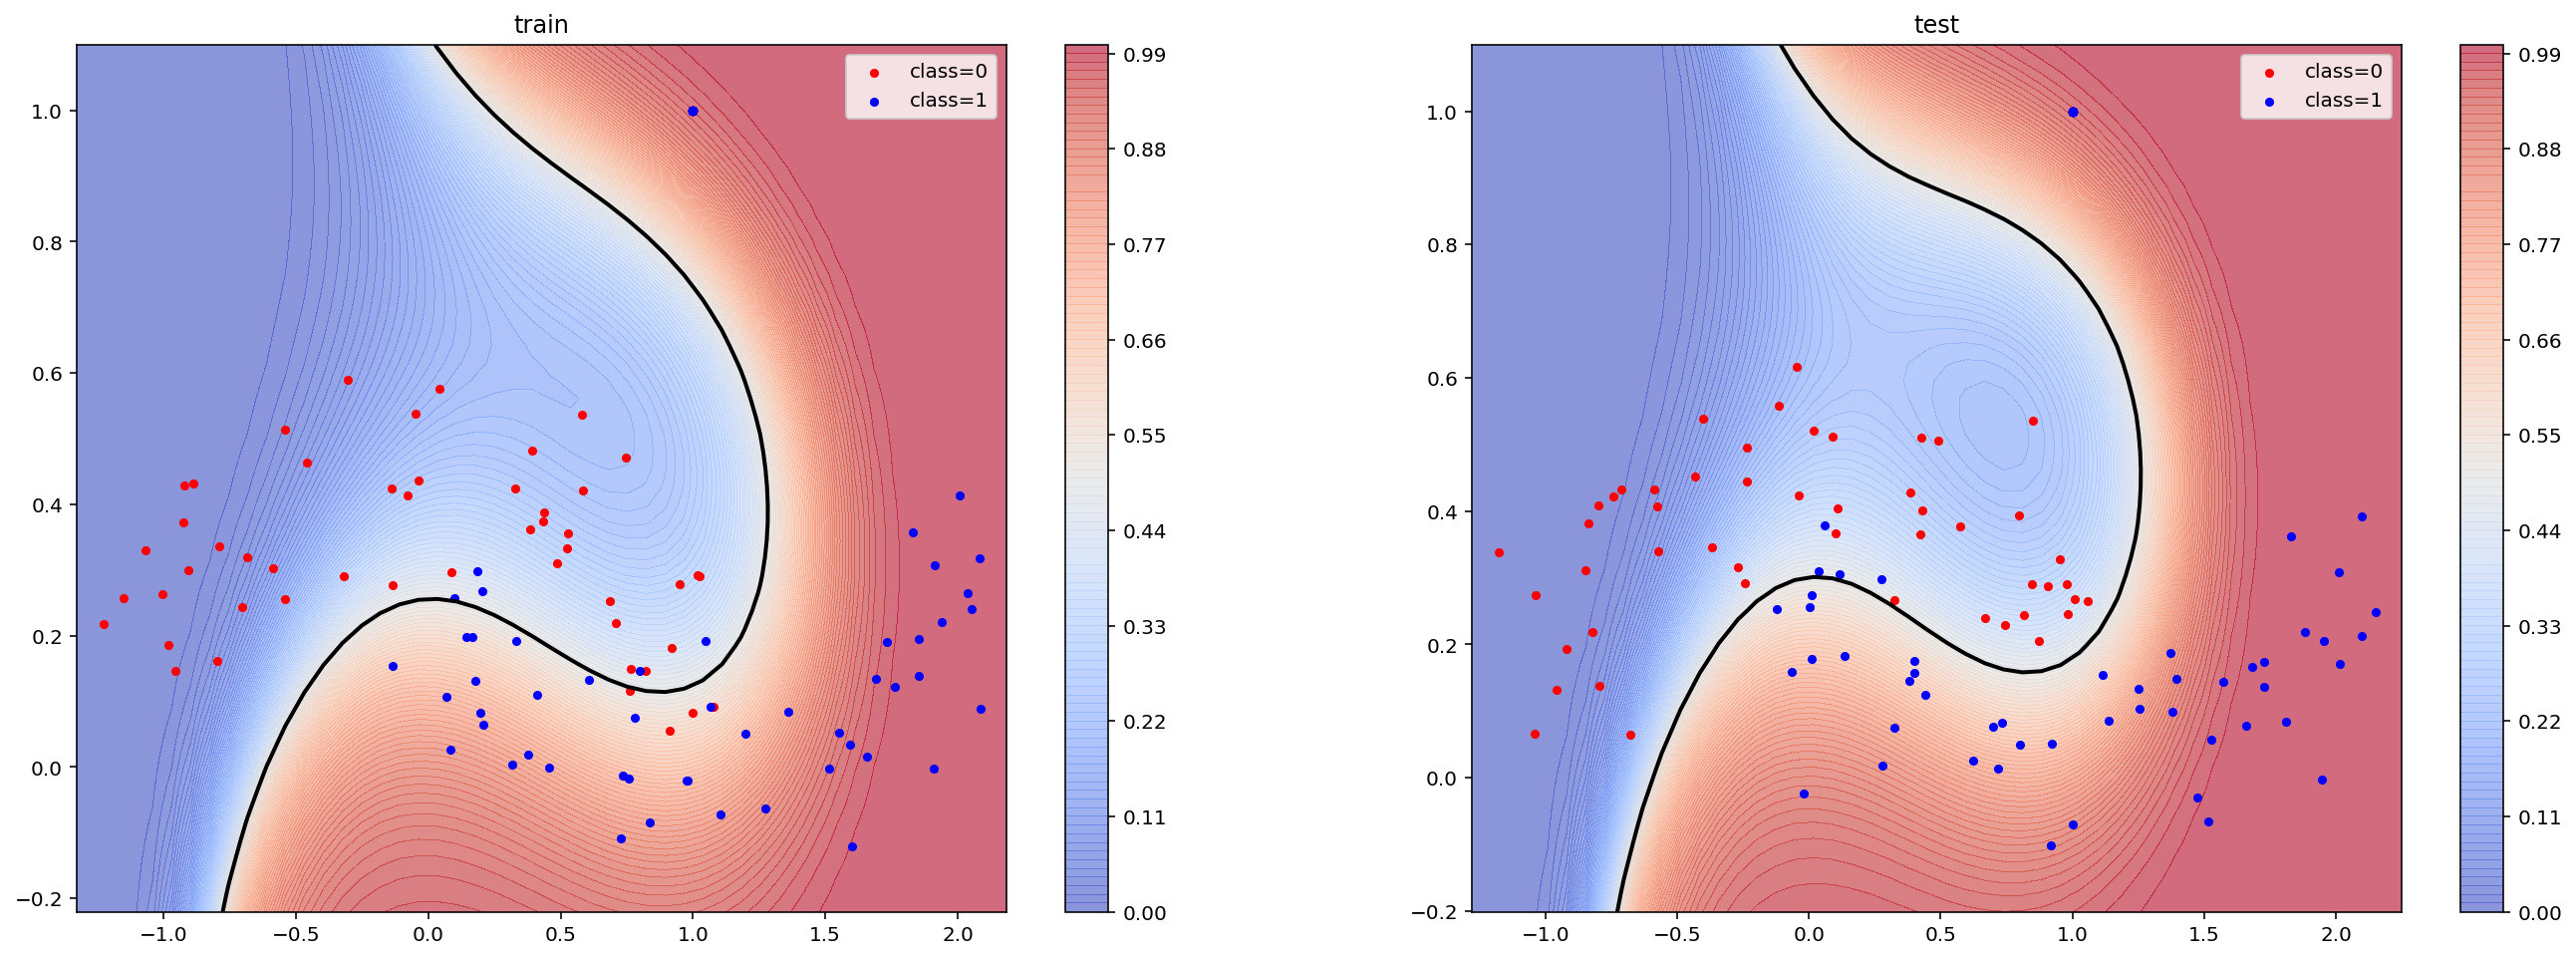

In [16]:
x1_min_train, x1_max_train = X_train[:,1].min() - 0.1, X_train[:,1].max() + 0.1# min and max of grade 1
x1_min_test, x1_max_test = X_test[:,1].min() - 0.1, X_test[:,1].max() + 0.1# min and max of grade 1
x2_min_train, x2_max_train = X_train[:,2].min() - 0.1, X_train[:,2].max() + 0.1# min and max of grade 2
x2_min_test, x2_max_test = X_test[:,2].min() - 0.1, X_test[:,2].max() + 0.1# min and max of grade 2

xx1_train, xx2_train = np.meshgrid(np.linspace(x1_min_train, x1_max_train), np.linspace(x2_min_train, x2_max_train)) # create meshgrid
xx1_test, xx2_test = np.meshgrid(np.linspace(x1_min_test, x1_max_test), np.linspace(x2_min_test, x2_max_test)) # create meshgrid

X2_train = np.ones([np.prod(xx1_train.shape), 10])
X2_test = np.ones([np.prod(xx1_test.shape), 10])

a = xx1_train.reshape(-1)
b = xx2_train.reshape(-1)

X2_train[:,1] = a
X2_train[:,2] = b
X2_train[:,3] = a * b
X2_train[:,4] = a * a
X2_train[:,5] = b * b
X2_train[:,6] = a * a * b
X2_train[:,7] = a * b * b
X2_train[:,8] = a * a * a
X2_train[:,9] = b * b * b

a = xx1_test.reshape(-1)
b = xx2_test.reshape(-1)

X2_test[:,1] = a
X2_test[:,2] = b
X2_test[:,3] = a * b
X2_test[:,4] = a * a
X2_test[:,5] = b * b
X2_test[:,6] = a * a * b
X2_test[:,7] = a * b * b
X2_test[:,8] = a * a * a
X2_test[:,9] = b * b * b


p_train = f_pred(X2_train, w_train)
p_train = p_train.reshape(50,50)

p_test = f_pred(X2_test, w_test)
p_test = p_test.reshape(50,50)


plt.figure(4,figsize=(23,8))

plt.subplot(121)
ax = plt.contourf(xx1_train,xx2_train,p_train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_train, xx2_train, p_train, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('train')

plt.subplot(122)
ax = plt.contourf(xx1_test,xx2_test,p_test,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_test, xx2_test, p_test, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('test')

plt.show()


#output
---

1. Plot the training data [0.5pt]

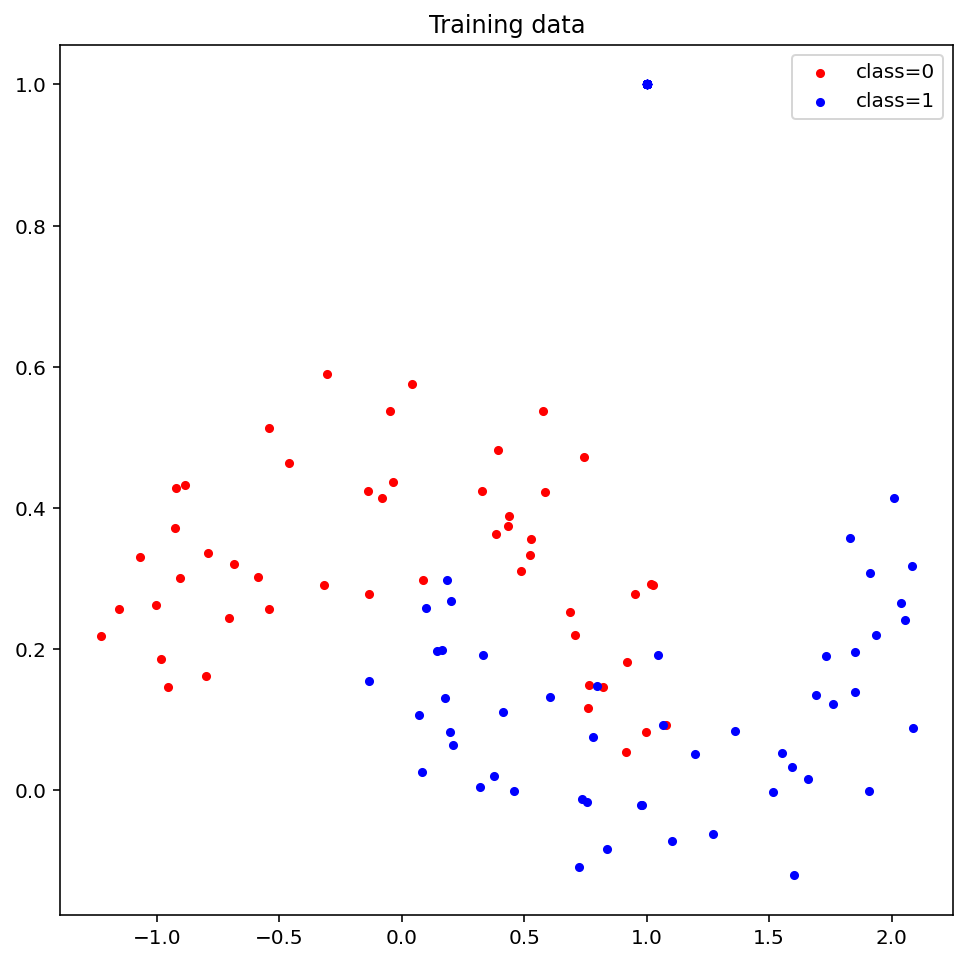

In [3]:
plt.figure(1,figsize=(8,8))
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

2. Plot the testing data [0.5pt]

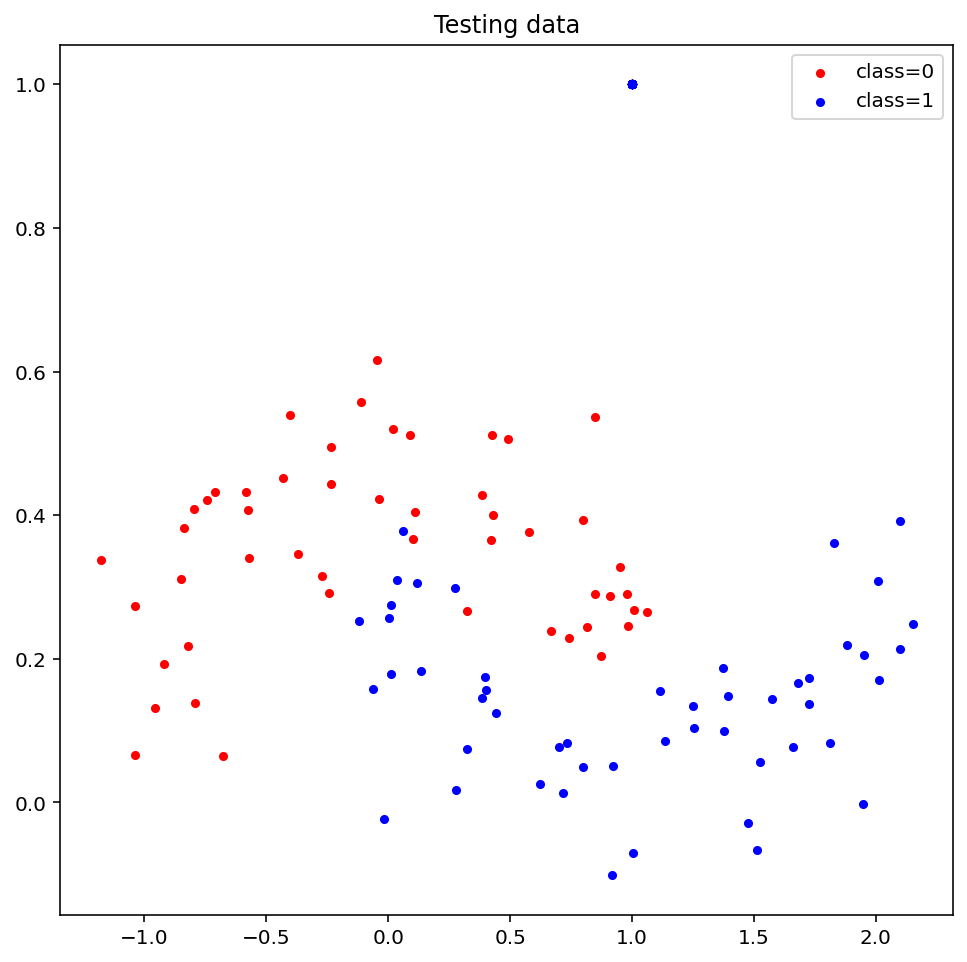

In [5]:
plt.figure(1,figsize=(8,8))
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

##### 3. Plot the learning curve with $\lambda = 0.00001$ [1pt]
- plot both the training loss in blue and the testing loss in red at the same figure

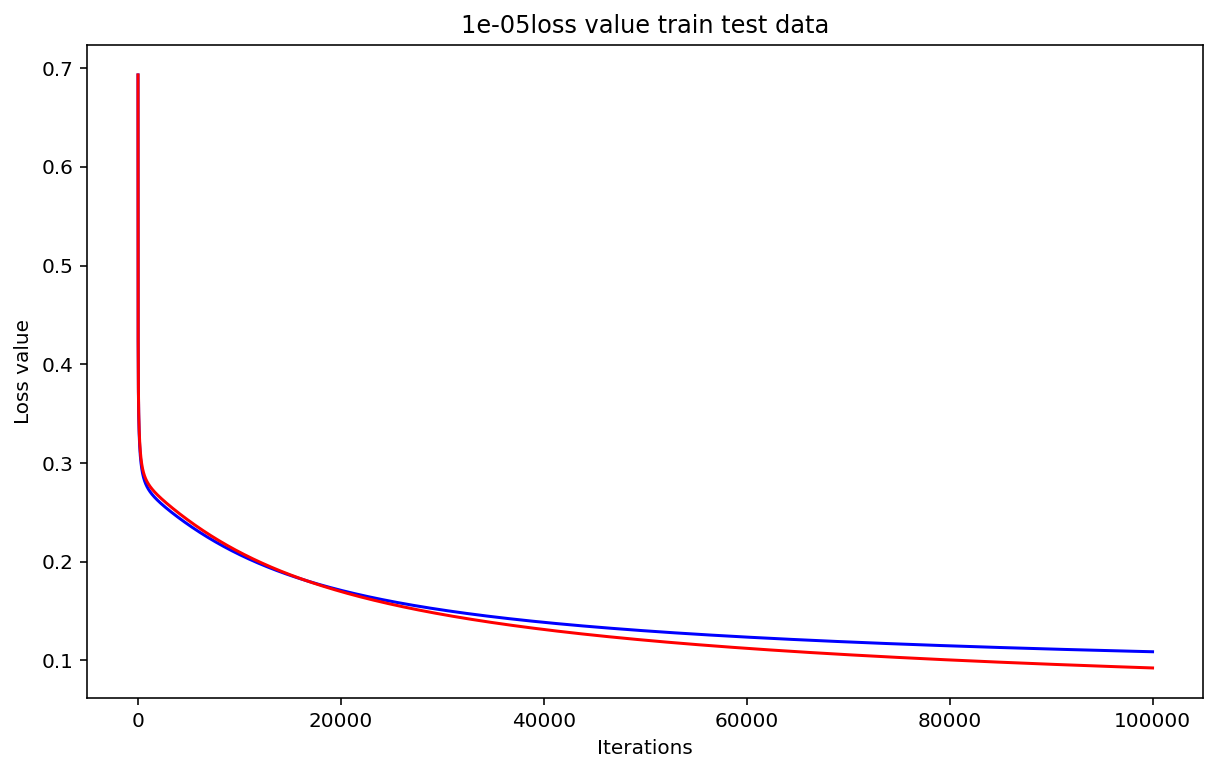

In [8]:
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, color='blue')
plt.plot(np.array(range(max_iter)), L_iters_test, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title(str(ramda) + 'loss value train test data')
plt.show()

##### 4. Plot the learning curve with $\lambda = 0.0001$ [1pt]
- plot both the training loss in blue and the testing loss in red at the same figure

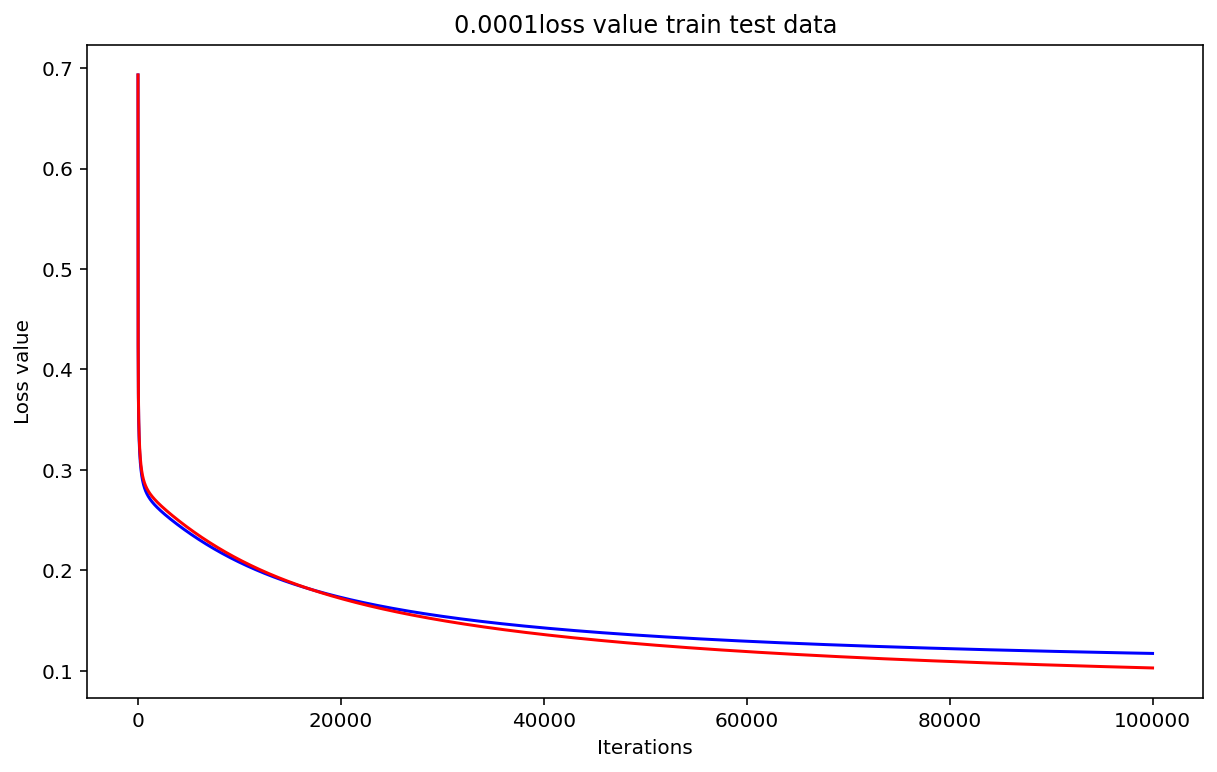

In [13]:
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, color='blue')
plt.plot(np.array(range(max_iter)), L_iters_test, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title(str(ramda) + 'loss value train test data')
plt.show()

##### 5. Plot the learning curve with $\lambda = 0.001$ [1pt]
- plot both the training loss in blue and the testing loss in red at the same figure

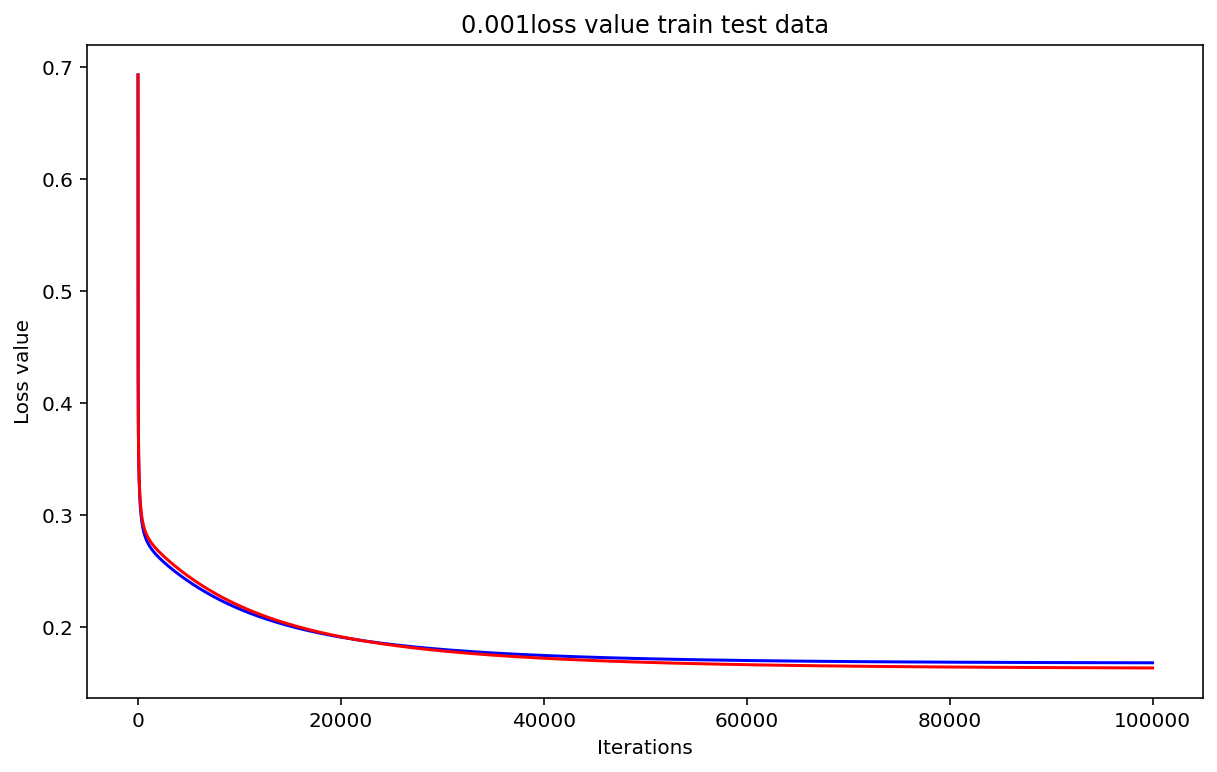

In [17]:
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, color='blue')
plt.plot(np.array(range(max_iter)), L_iters_test, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title(str(ramda) + 'loss value train test data')
plt.show()

##### 6. Plot the learning curve with $\lambda = 0.01$ [1pt]
- plot both the training loss in blue and the testing loss in red at the same figure

In [ ]:
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, color='blue')
plt.plot(np.array(range(max_iter)), L_iters_test, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title(str(ramda) + 'loss value train test data')
plt.show()

##### 7. Plot the learning curve with $\lambda = 0.1$ [1pt]
- plot both the training loss in blue and the testing loss in red at the same figure

In [ ]:
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, color='blue')
plt.plot(np.array(range(max_iter)), L_iters_test, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title(str(ramda) + 'loss value train test data')
plt.show()

##### 8. Plot the probability map of the obtained classifier with $\lambda = 0.00001$ [1pt]
- plot the probability map on the training data on the left
- plot the probability map on the testing data on the right

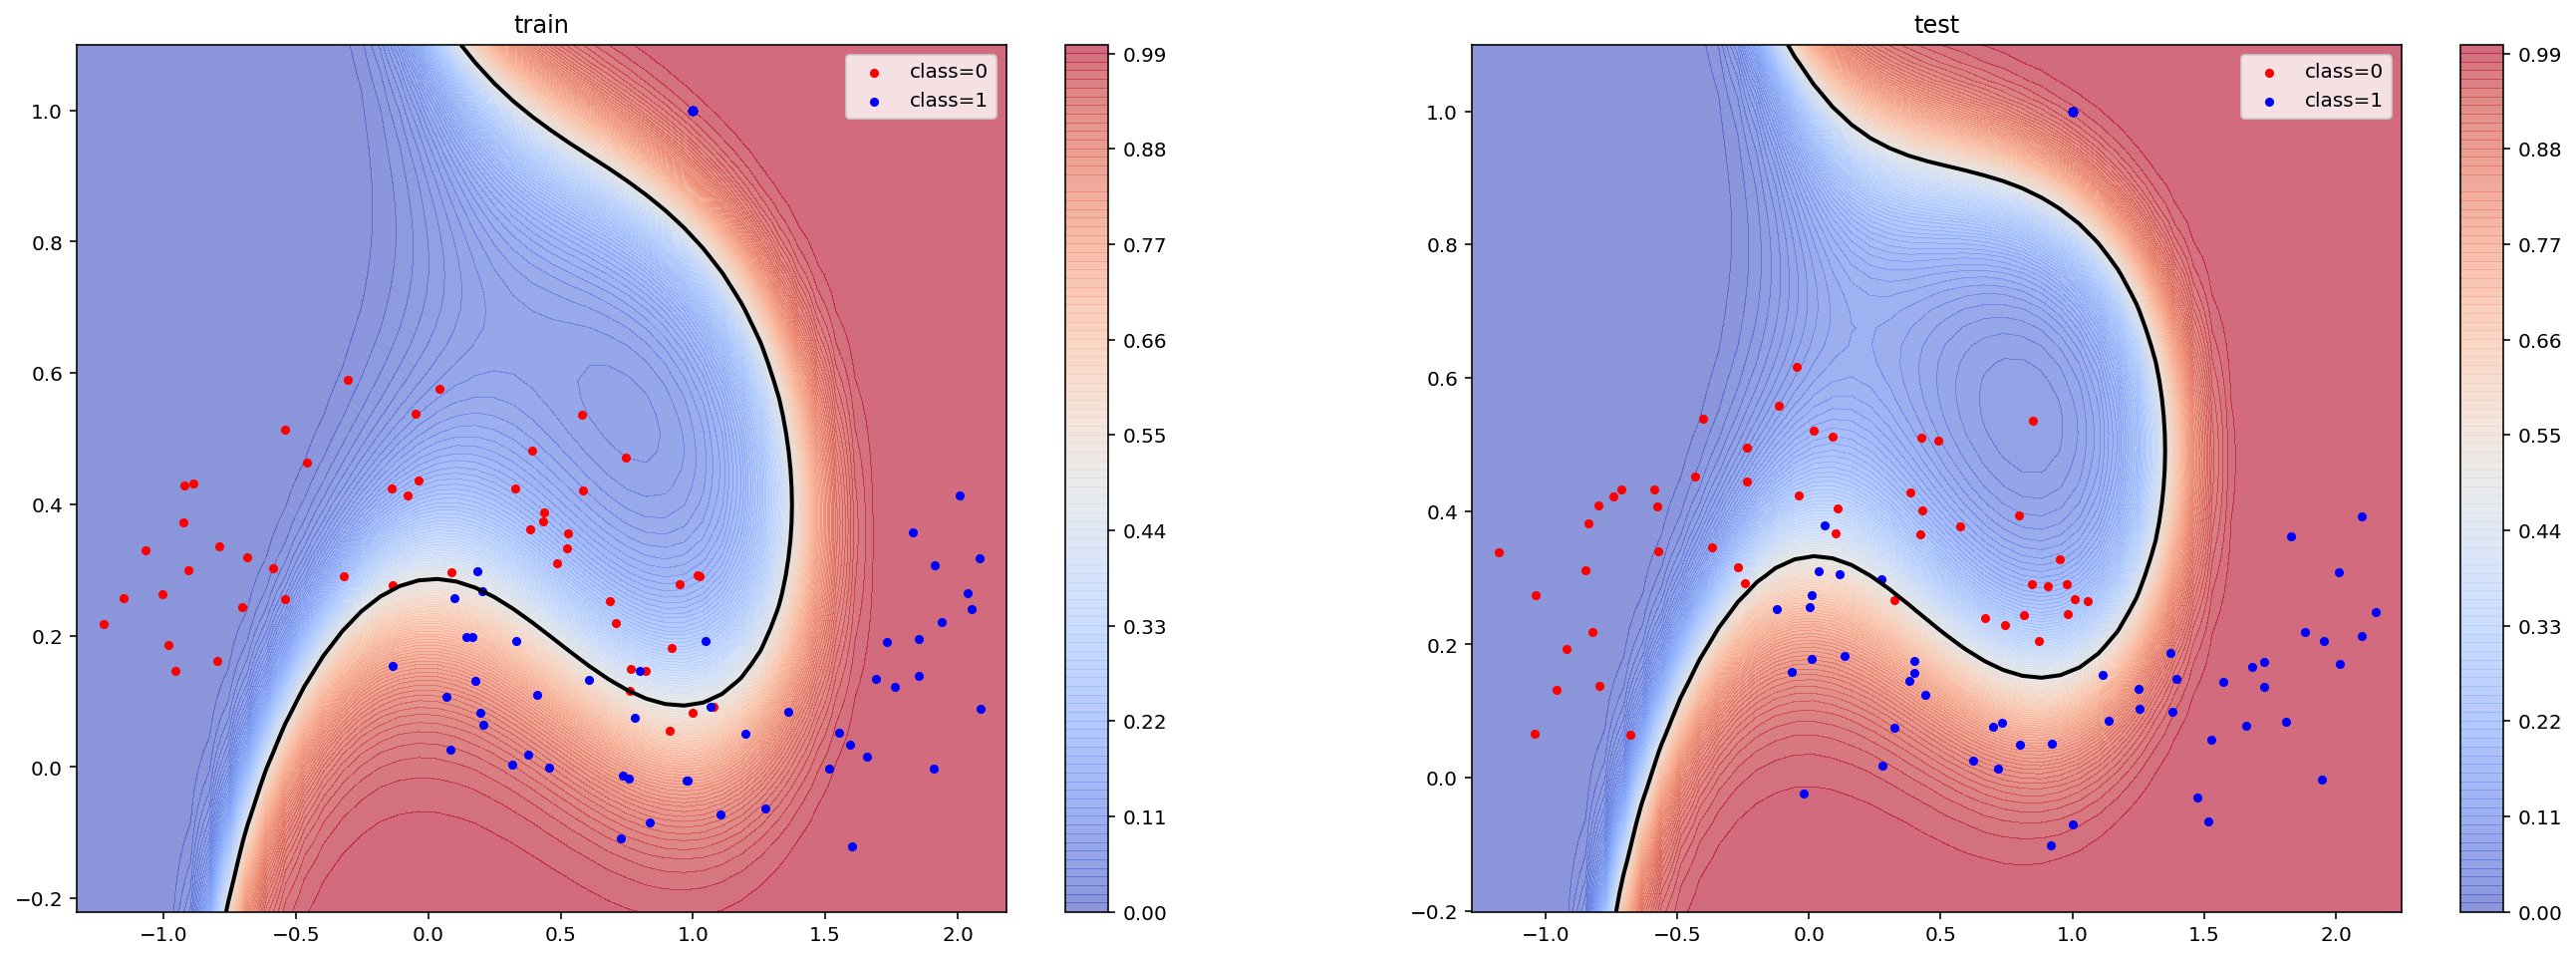

In [10]:
plt.figure(4,figsize=(23,8))

plt.subplot(121)
ax = plt.contourf(xx1_train,xx2_train,p_train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_train, xx2_train, p_train, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('train')

plt.subplot(122)
ax = plt.contourf(xx1_test,xx2_test,p_test,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_test, xx2_test, p_test, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('test')

plt.show()

##### 9. Plot the probability map of the obtained classifier with $\lambda = 0.0001$ [1pt]

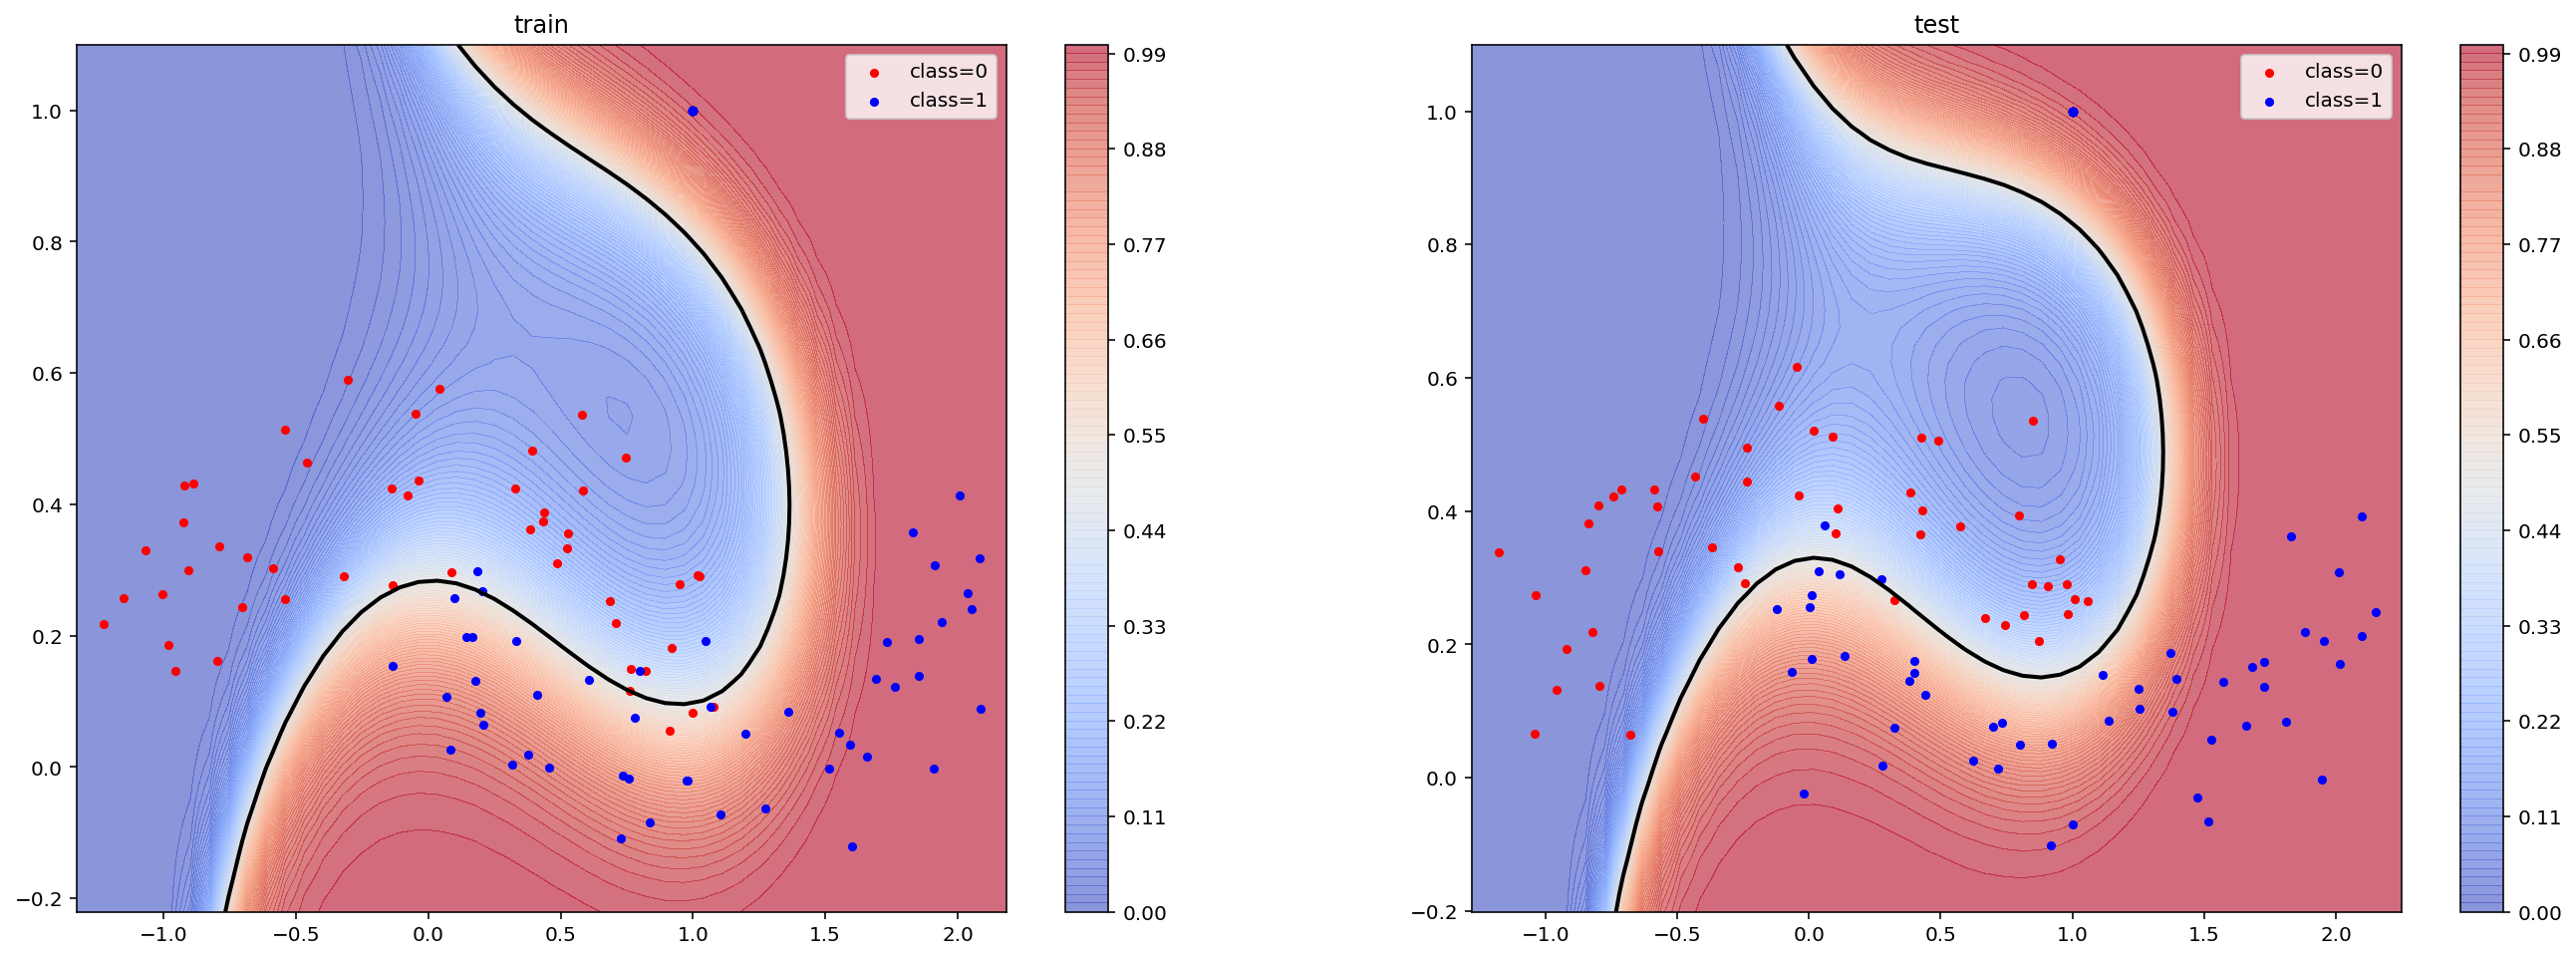

In [14]:
plt.figure(4,figsize=(23,8))

plt.subplot(121)
ax = plt.contourf(xx1_train,xx2_train,p_train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_train, xx2_train, p_train, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('train')

plt.subplot(122)
ax = plt.contourf(xx1_test,xx2_test,p_test,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_test, xx2_test, p_test, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('test')

plt.show()

##### 10. Plot the probability map of the obtained classifier with $\lambda = 0.001$ [1pt]

In [ ]:
plt.figure(4,figsize=(23,8))

plt.subplot(121)
ax = plt.contourf(xx1_train,xx2_train,p_train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_train, xx2_train, p_train, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('train')

plt.subplot(122)
ax = plt.contourf(xx1_test,xx2_test,p_test,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_test, xx2_test, p_test, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('test')

plt.show()

##### 11. Plot the probability map of the obtained classifier with $\lambda = 0.01$ [1pt]

In [ ]:
plt.figure(4,figsize=(23,8))

plt.subplot(121)
ax = plt.contourf(xx1_train,xx2_train,p_train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_train, xx2_train, p_train, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('train')

plt.subplot(122)
ax = plt.contourf(xx1_test,xx2_test,p_test,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_test, xx2_test, p_test, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('test')

plt.show()

##### 12. Plot the probability map of the obtained classifier with $\lambda = 0.1$ [1pt]

In [ ]:
plt.figure(4,figsize=(23,8))

plt.subplot(121)
ax = plt.contourf(xx1_train,xx2_train,p_train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train_0, x2_train_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train_1, x2_train_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_train, xx2_train, p_train, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('train')

plt.subplot(122)
ax = plt.contourf(xx1_test,xx2_test,p_test,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test_0, x2_test_0, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test_1, x2_test_1, s=50, c='b', marker='.', label='class=1')
plt.contour(xx1_test, xx2_test, p_test, levels=1,linewidths=2, colors='k') 
plt.legend()
plt.title('test')

plt.show()

##### 13. Print the final training accuracy with the given regularization parameters [2.5pt]
- the accuracy is computed based on the training data with varying regularization parameters

| $\lambda$   | Training Accuracy (%) |
| ------------- |:---------------------:|
| 0.00001       |                       |
| 0.0001        |                       |
| 0.001         |                       |
| 0.01          |                       |
| 0.1           |                       |

##### 14. Print the final testing accuracy with the given regularization parameters [2.5pt]
- the accuracy is computed based on the testing data with varying regularization parameters

| $\lambda$   | Testing Accuracy (%) |
| ------------- |:--------------------:|
| 0.00001       |                      |
| 0.0001        |                      |
| 0.001         |                      |
| 0.01          |                      |
| 0.1           |                      |